<a href="https://colab.research.google.com/github/Kemar73/Data-analysis-task/blob/master/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation

Kaggle : https://www.kaggle.com/jeanmidev/crossfit-games#2019_games_athletes.csv

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df=pd.read_csv('/content/drive/My Drive/2019_games_athletes.csv')

In [0]:
df.head()

,height,affiliateid,countryoforiginname,weight,affiliatename,status,bibid,profilepics3key,competitorid,firstname,gender,age,lastname,countryoforigincode,competitorname,overallrank,overallscore,division
0,1.74,44632.0,United States,88.5,CrossFit Mayhem,ACT,016,9e218-P153604_4-184.jpg,153604,Mathew,M,29,Fraser,US,Mathew Fraser,1,984.0,Men
1,1.74,44800.0,United States,86.2,Peak 360 CrossFit,ACT,302,0a0bc-P2725_5-184.jpg,2725,Noah,M,28,Ohlsen,US,Noah Ohlsen,2,949.0,Men
2,1.55,44753.0,Iceland,83.9,CrossFit Hengill,ACT,122,4c5dc-P81616_4-184.jpg,81616,Björgvin Karl,M,26,Guðmundsson,IS,Björgvin Karl Guðmundsson,3,888.0,Men
3,1.80,44597.0,United States,84.8,CrossFit Mentality,ACT,105,e23e0-P34796_8-184.jpg,34796,Scott,M,31,Panchik,US,Scott Panchik,4,795.0,Men
4,1.55,44792.0,Australia,87.1,CrossFit Mode,ACT,303,b7c6d-P16080_7-184.jpg,16080,James,M,28,Newbury,AU,James Newbury,5,728.0,Men


We only keep columns that we could need

In [0]:
# Remove some columns
cols=['height','countryoforiginname','weight','affiliatename','gender','age','countryoforigincode','overallrank','overallscore','division']
df.drop(df.columns.difference(cols), axis=1, inplace=True)

In [0]:
df.head()

,height,countryoforiginname,weight,affiliatename,gender,age,countryoforigincode,overallrank,overallscore,division
0,1.74,United States,88.5,CrossFit Mayhem,M,29,US,1,984.0,Men
1,1.74,United States,86.2,Peak 360 CrossFit,M,28,US,2,949.0,Men
2,1.55,Iceland,83.9,CrossFit Hengill,M,26,IS,3,888.0,Men
3,1.80,United States,84.8,CrossFit Mentality,M,31,US,4,795.0,Men
4,1.55,Australia,87.1,CrossFit Mode,M,28,AU,5,728.0,Men


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   height               394 non-null    float64
 1   countryoforiginname  394 non-null    object 
 2   weight               394 non-null    float64
 3   affiliatename        357 non-null    object 
 4   gender               394 non-null    object 
 5   age                  394 non-null    int64  
 6   countryoforigincode  393 non-null    object 
 7   overallrank          394 non-null    object 
 8   overallscore         391 non-null    float64
 9   division             394 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 30.9+ KB


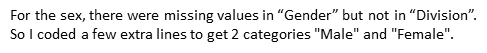

In [0]:
# Merging dataframes
df_test = pd.DataFrame({
    'division':      ['Men', 'Men (35-39)','Men (40-44)','Men (45-49)','Men (50-54)','Men (55-59)','Men (60+)',
                      'Women', 'Women (35-39)','Women (40-44)','Women (45-49)','Women (50-54)','Women (55-59)','Women (60+)'],
    'sex': ['Male','Male','Male','Male','Male','Male','Male','Female','Female','Female','Female','Female','Female','Female'],
})
print(df_test)
# Inner join
df=df.merge(df_test)




         division     sex
0             Men    Male
1     Men (35-39)    Male
2     Men (40-44)    Male
3     Men (45-49)    Male
4     Men (50-54)    Male
5     Men (55-59)    Male
6       Men (60+)    Male
7           Women  Female
8   Women (35-39)  Female
9   Women (40-44)  Female
10  Women (45-49)  Female
11  Women (50-54)  Female
12  Women (55-59)  Female
13    Women (60+)  Female


In [0]:
print(df)


     height countryoforiginname  weight  ... overallscore     division     sex
0      1.74       United States    88.5  ...        984.0          Men    Male
1      1.74       United States    86.2  ...        949.0          Men    Male
2      1.55             Iceland    83.9  ...        888.0          Men    Male
3      1.80       United States    84.8  ...        795.0          Men    Male
4      1.55           Australia    87.1  ...        728.0          Men    Male
..      ...                 ...     ...  ...          ...          ...     ...
389    1.65       United States    71.2  ...        380.0  Women (60+)  Female
390    1.62       United States    53.1  ...        310.0  Women (60+)  Female
391    1.25       United States    50.8  ...        290.0  Women (60+)  Female
392    1.68              Canada    57.2  ...        250.0  Women (60+)  Female
393    1.68              Canada    55.8  ...        190.0  Women (60+)  Female

[394 rows x 11 columns]


In [0]:
# Basic metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_metrics(y_true, y_pred):
    print(f'Accuracy : {accuracy_score(y_true, y_pred):.2f}')
    print(f'Precision: {precision_score(y_true, y_pred):.2f}')
    print(f'Recall   : {recall_score(y_true, y_pred):.2f}')
    print(f'F1-score : {f1_score(y_true, y_pred):.2f}')

In [0]:
 # Decision boundary plot


# Adapted from:
# https://gist.github.com/anandology/772d44d291a9daa198d4

def plot_decision_boundaries(X, y, feature_labels, class_labels, model=None):
    """Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    
    One possible improvement could be to use all columns fot fitting
    and using the first 2 columns and median of all other columns
    for predicting.
    
    Adopted from:
    http://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html
    http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html
    """
    reduced_data = X[:, :2]

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .01     # point in the mesh [x_min, m_max]x[y_min, y_max].    
    margin = 0.5

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - margin, reduced_data[:, 0].max() + margin
    y_min, y_max = reduced_data[:, 1].min() - margin, reduced_data[:, 1].max() + margin
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    if model:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
    y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    if model:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.4)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8, edgecolors='black')
    plt.xlabel(feature_labels[0])
    plt.ylabel(feature_labels[1])
#     plt.legend(handles=scatter.legend_elements()[0], labels=class_labels)
#     plt.legend()
    return plt

Text(0.5, 1.0, 'Athletes sexes')

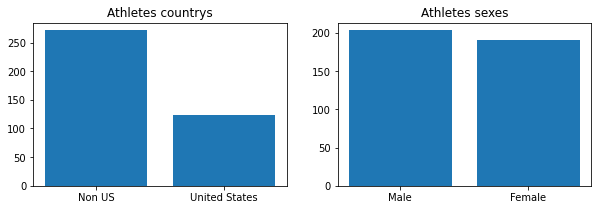

In [0]:
# Merging some smaller classes into one
df['C'] = df['countryoforiginname'].apply(lambda x: x if x == 'United States' else 'Non US')
df['S'] = df['sex'].apply(lambda x: x if x == 'Male' else 'Female')


# Visualize them
def plot_counts(df, col):
    users_count2 = df.groupby(col)[col].agg(['count']).reset_index()
    users_count2.sort_values('count', ascending=False, inplace=True)
    plt.bar(users_count2[col], users_count2['count'])
    
fig = plt.figure(figsize=(10, 3))

fig.add_subplot(121)
plot_counts(df, 'C')
plt.title('Athletes countrys')

fig.add_subplot(122)
plot_counts(df, 'S')
plt.title('Athletes sexes')

We see that, in our dataset, approximately 1/3 of the athletes are from USA, and 2/3 from abroad. We also see that there is a bit more men than women, but not by far. 

# Experiments

## Train/test split

In [0]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# NOTE: requires scikit-learn version 0.22.2
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

# Rejecting some rows with null values
filter1 = (df['weight'].notnull())
df_filtered = df[filter1].reset_index()

# Train/test row indexes
train_indexes, test_indexes = train_test_split(df_filtered.index, random_state=100)

# Using two input features
X = df_filtered[['height', 'weight']].values
feature_names = ['Height', 'Weight']

# Normalize the inputs
X = StandardScaler().fit_transform(X)

# Prepare inputs
X_train, X_test = X[train_indexes], X[test_indexes]

# Prepare outputs
le_country, le_sex = LabelEncoder(), LabelEncoder()
y_country = le_country.fit_transform(df_filtered['C'])
y_sex = le_sex.fit_transform(df_filtered['S'])
y_country_train, y_country_test = y_country[train_indexes], y_country[test_indexes]
y_sex_train, y_sex_test = y_sex[train_indexes], y_sex[test_indexes]

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

## Atlhetes countrys prediction


In [0]:
lr_country1 = LogisticRegression()
dt_country1 = DecisionTreeClassifier()

lr_country1.fit(X_train, y_country_train)
dt_country1.fit(X_train, y_country_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Text(0.5, 1.0, 'Decision tree')

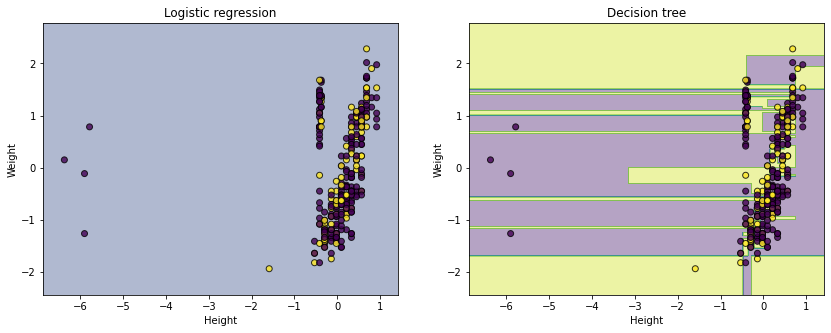

In [0]:
fig = plt.figure(figsize=(14, 5))

fig.add_subplot(121)
plot_decision_boundaries(X_train, y_country_train, 
                         feature_names, le_country.classes_, lr_country1)
plt.title('Logistic regression')

fig.add_subplot(122)
plot_decision_boundaries(X_train, y_country_train, 
                         feature_names, le_country.classes_, dt_country1)
plt.title('Decision tree')

In [0]:
print('Logistic regression')
print('-------------------')
print('Training set:')
print_metrics(y_country_train, lr_country1.predict(X_train))

print()
print('Test set:')
print_metrics(y_country_test, lr_country1.predict(X_test))

Logistic regression
-------------------
Training set:
Accuracy : 0.69
Precision: 0.00
Recall   : 0.00
F1-score : 0.00

Test set:
Accuracy : 0.69
Precision: 0.00
Recall   : 0.00
F1-score : 0.00


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
 print('Decision tree')
print('-------------------')
print('Training set:')
print_metrics(y_country_train, dt_country1.predict(X_train))

print()
print('Test set:')
print_metrics(y_country_test, dt_country1.predict(X_test))

Decision tree
-------------------
Training set:
Accuracy : 0.89
Precision: 0.94
Recall   : 0.70
F1-score : 0.80

Test set:
Accuracy : 0.57
Precision: 0.30
Recall   : 0.29
F1-score : 0.30


So for the country of athletes, we see that neither the logistic regression or the decision tree is efficient. Which is normal, as we would expect, since there is only a very little chance that there is a correlation between weight and height of an athlete and his country. For logistic regression, the accuracy of 0.69 comes from the fact that 69% of the athletes are not American.

Text(0.5, 1.0, 'Decision tree')

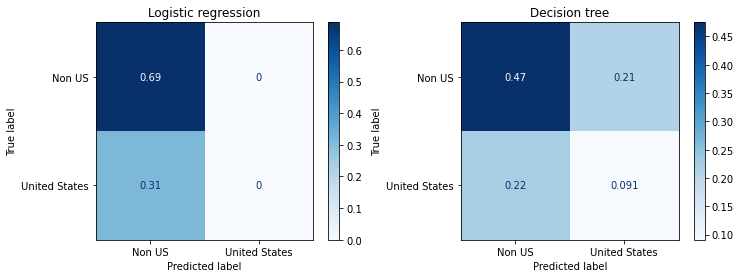

In [0]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plot_confusion_matrix(lr_country1, X_test, y_country_test,
                      cmap=plt.cm.Blues, normalize='all', 
                      display_labels=le_country.classes_, ax=ax1)
ax1.set_title('Logistic regression')

plot_confusion_matrix(dt_country1, X_test, y_country_test,
                      cmap=plt.cm.Blues, normalize='all', 
                      display_labels=le_country.classes_, ax=ax2)
ax2.set_title('Decision tree')

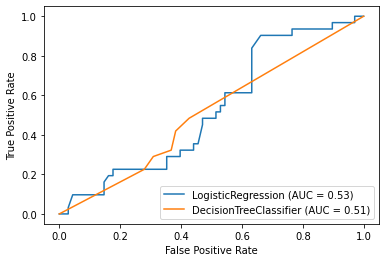

In [0]:
roc = plot_roc_curve(lr_country1, X_test, y_country_test)
plot_roc_curve(dt_country1, X_test, y_country_test, ax=roc.ax_)

So the same, the confusion matrix are not really useful because of the absence of correlation. We are now interested in the ROC curve (characteristic curve of the receiver's operation). We see that the AUC (the area under the curve) is approximately 50%. This means that about 1 in 2 predictions is correct. So by chance. So you can't define if an athlete is from US or not only knowing his weight and height.


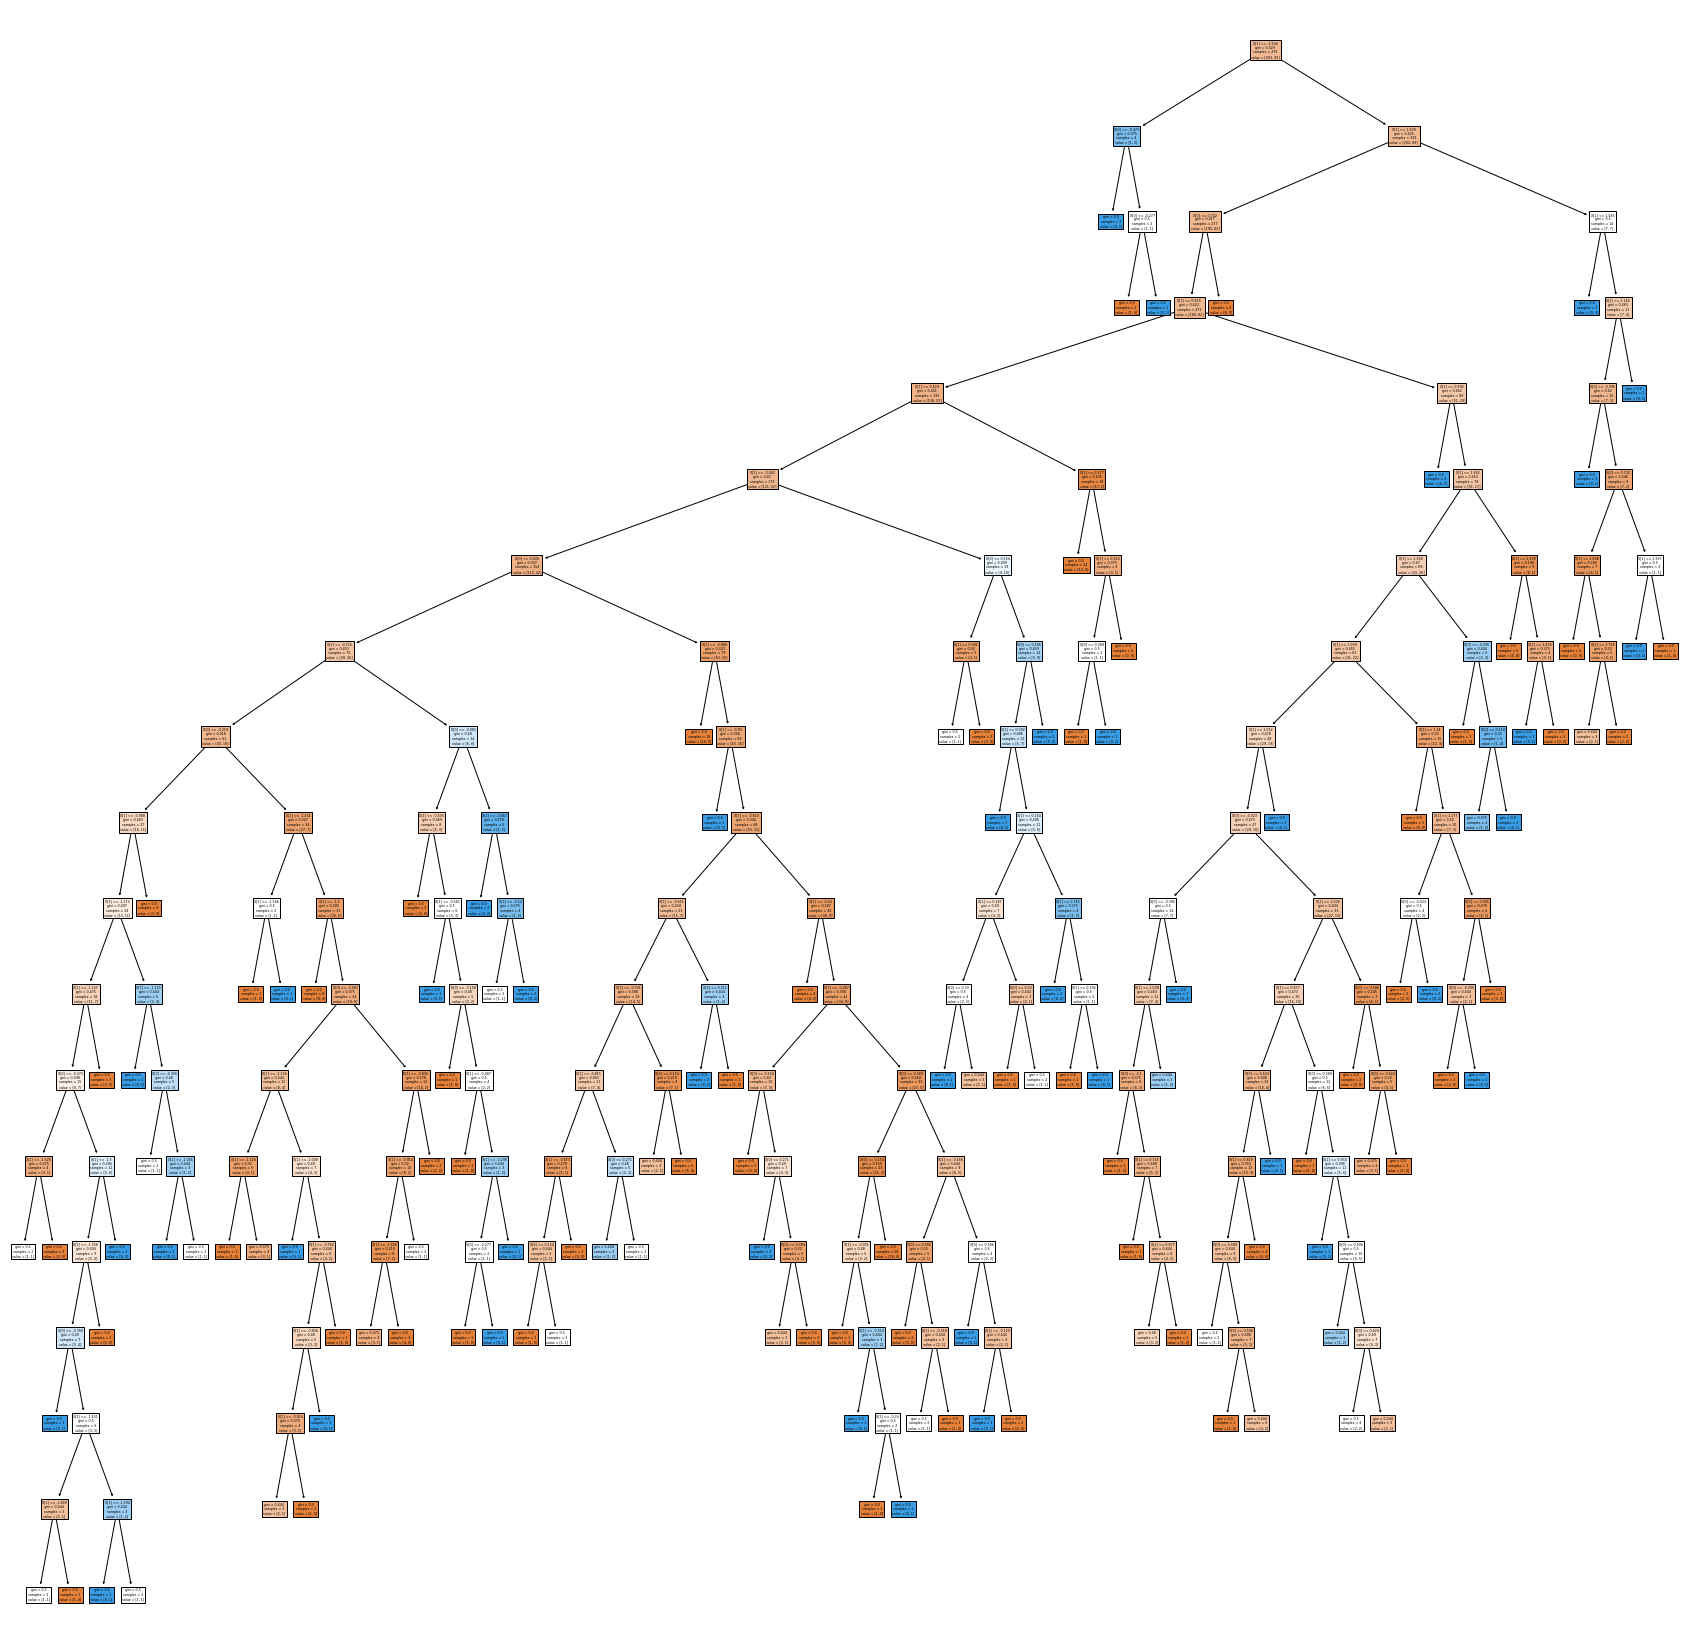

In [0]:
# Decision tree visualization
from sklearn.tree import plot_tree

plt.figure(figsize=(30, 30))
plot_tree(dt_country1, filled=True)
plt.show()

## Athletes sex prediction


In [0]:
lr_sex1 = LogisticRegression()
dt_sex1 = DecisionTreeClassifier()

lr_sex1.fit(X_train, y_sex_train)
dt_sex1.fit(X_train, y_sex_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Text(0.5, 1.0, 'Decision tree')

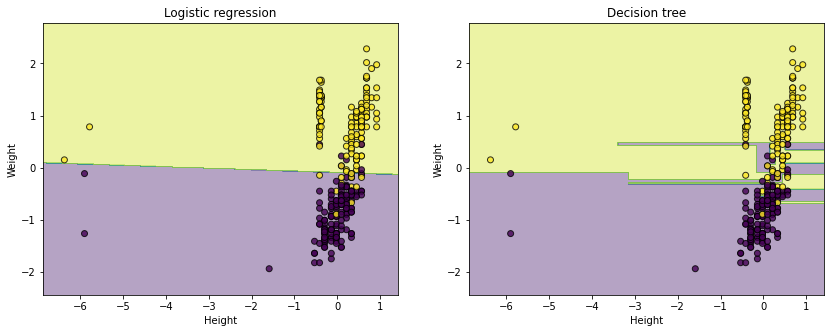

In [0]:
fig = plt.figure(figsize=(14, 5))

fig.add_subplot(121)
plot_decision_boundaries(X_train, y_sex_train, 
                         feature_names, le_sex.classes_, lr_sex1)
plt.title('Logistic regression')

fig.add_subplot(122)
plot_decision_boundaries(X_train, y_sex_train, 
                         feature_names, le_sex.classes_, dt_sex1)
plt.title('Decision tree')

In [0]:
print('Logistic regression')
print('-------------------')
print('Training set:')
print_metrics(y_sex_train, lr_sex1.predict(X_train))

print()
print('Test set:')
print_metrics(y_sex_test, lr_sex1.predict(X_test))

Logistic regression
-------------------
Training set:
Accuracy : 0.94
Precision: 0.96
Recall   : 0.91
F1-score : 0.93

Test set:
Accuracy : 0.94
Precision: 0.96
Recall   : 0.93
F1-score : 0.94


In [0]:
print('Decision tree')
print('-------------------')
print('Training set:')
print_metrics(y_sex_train, dt_sex1.predict(X_train))

print()
print('Test set:')
print_metrics(y_sex_test, dt_sex1.predict(X_test))

Decision tree
-------------------
Training set:
Accuracy : 0.98
Precision: 1.00
Recall   : 0.96
F1-score : 0.98

Test set:
Accuracy : 0.93
Precision: 0.93
Recall   : 0.95
F1-score : 0.94


Then, for the prediction of sex, our classification models are much more effective. We can see from the graphs and statistics that each of the two methods allows in most cases to determine the sex based on weight and height. Which is logical considering the differences in morphology between men and women.

Text(0.5, 1.0, 'Decision tree')

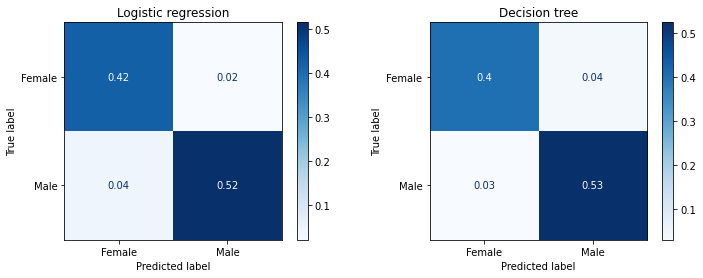

In [0]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plot_confusion_matrix(lr_sex1, X_test, y_sex_test,
                      cmap=plt.cm.Blues, normalize='all', 
                      display_labels=le_sex.classes_, ax=ax1)
ax1.set_title('Logistic regression')

plot_confusion_matrix(dt_sex1, X_test, y_sex_test,
                      cmap=plt.cm.Blues, normalize='all', 
                      display_labels=le_sex.classes_, ax=ax2)
ax2.set_title('Decision tree')

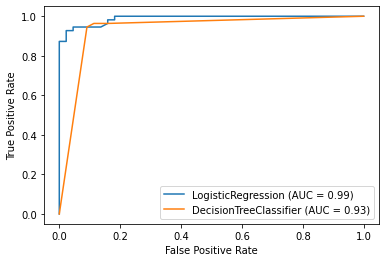

In [0]:
roc = plot_roc_curve(lr_sex1, X_test, y_sex_test)
plot_roc_curve(dt_sex1, X_test, y_sex_test, ax=roc.ax_)

For each of the 2 methods, the confusion matrix is very good. Indeed, very few errors (6% for logistic regression and 7% for the decision tree). AUC (Area Under the ROC Curve) is 99% for logistic regression and 93% for the decision tree. Only 1 So even if the 2 methods are effective, we seem to be able to say that the logistic regression is slightly more adapted to the situation.

## Feature engineering


In [0]:
 # Using additional features

X2 = df_filtered[[
    'height', 'weight',
    'age',]].values
X2 = StandardScaler().fit_transform(X2)
X2_train, X2_test = X2[train_indexes], X2[test_indexes]

Country

In [0]:
lr_country2 = LogisticRegression()

lr_country2.fit(X2_train, y_country_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
print('Logistic regression (3 features)')
print('-------------------')
print('Training set:')
print_metrics(y_country_train, lr_country2.predict(X2_train))

print()
print('Test set:')
print_metrics(y_country_test, lr_country2.predict(X2_test))

Logistic regression (3 features)
-------------------
Training set:
Accuracy : 0.73
Precision: 0.63
Recall   : 0.34
F1-score : 0.44

Test set:
Accuracy : 0.75
Precision: 0.69
Recall   : 0.35
F1-score : 0.47


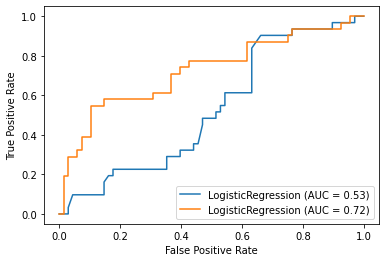

In [0]:
roc = plot_roc_curve(lr_country1, X_test, y_country_test)
plot_roc_curve(lr_country2, X2_test, y_country_test, ax=roc.ax_)

Sex

In [0]:
lr_sex2 = LogisticRegression()

lr_sex2.fit(X2_train, y_sex_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
print('Logistic regression (3 features)')
print('-------------------')
print('Training set:')
print_metrics(y_sex_train, lr_sex2.predict(X2_train))

print()
print('Test set:')
print_metrics(y_sex_test, lr_sex2.predict(X2_test))

Logistic regression (3 features)
-------------------
Training set:
Accuracy : 0.93
Precision: 0.94
Recall   : 0.92
F1-score : 0.93

Test set:
Accuracy : 0.92
Precision: 0.96
Recall   : 0.89
F1-score : 0.92


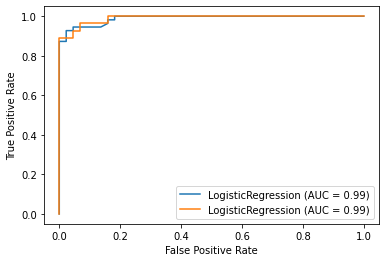

In [0]:
roc = plot_roc_curve(lr_sex1, X_test, y_sex_test)
plot_roc_curve(lr_sex2, X2_test, y_sex_test, ax=roc.ax_)

So now I've added the age variable.We are therefore trying to determine the country and gender of an athlete based on their height, weight and age.I focused here on logistic regression. For sex, no surprise, there was almost no classification error, so this will not change. For the country, however, there is a rather interesting improvement. And that’s my problem. How would adding age in addition to weight and height allow us to better determine the country of an athlete?